In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as oj

In [98]:
# set the path we want to look at
# dataids = ["361242", "361251", "361253", "361259", "361260"]
dataids = ["361242", "361251", "361253", "361254", "361256", "361259", "361260", "361622"]
seed = "1"
metric = "rmse"
pipeline = 2
clustertype = "kmeans"
paths = []
for dataid in dataids:
    paths.append(oj("results", f"pipeline{pipeline}", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))

In [99]:
data_results = []
for path in paths:
    files = os.listdir(path)
    method_results = []
    for file in files:
        method_result = pd.read_csv(oj(path, file))
        method_result = method_result.rename(columns={"rmse": file[:-4]})
        method_results.append(method_result)
    data_result = pd.concat(method_results, axis=1)
    data_result = data_result.loc[:, ~data_result.columns.str.contains('^Unnamed')]
    data_result = data_result.loc[:, ~data_result.columns.duplicated()]
    data_results.append(data_result)

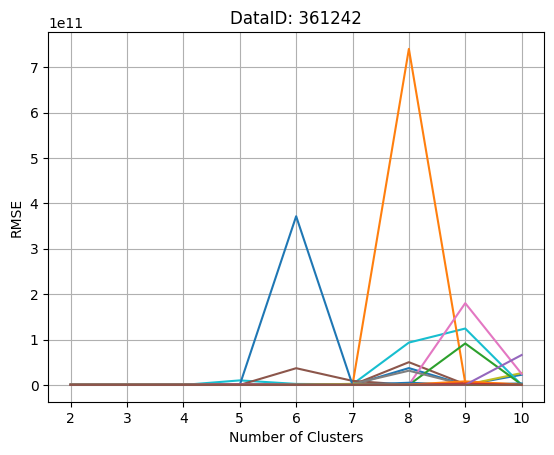

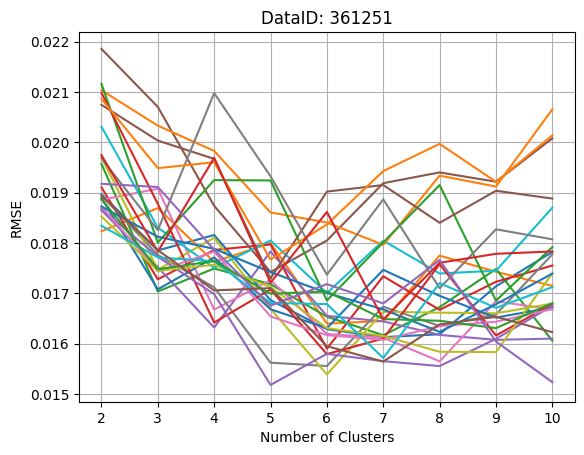

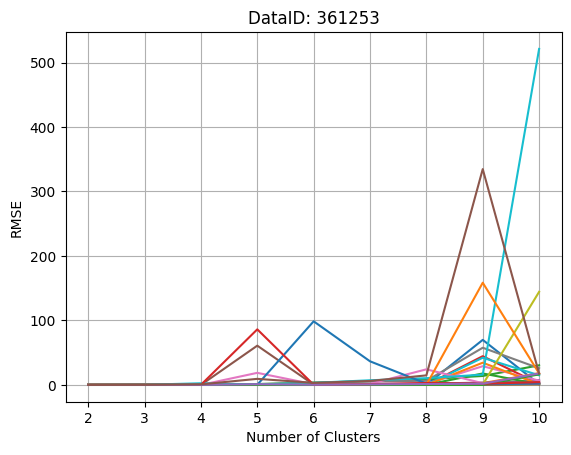

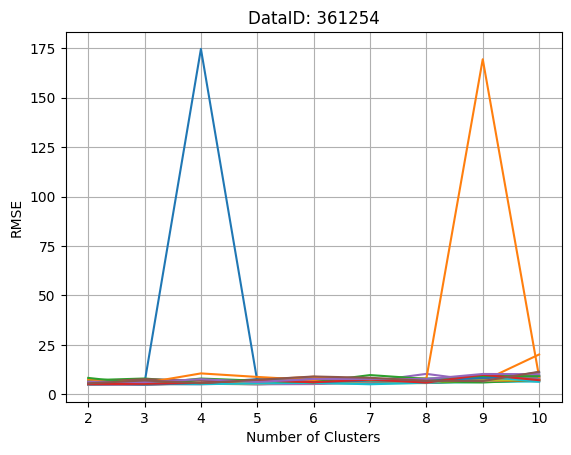

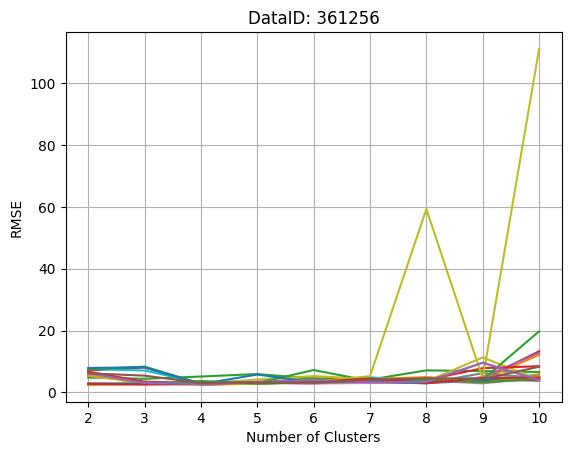

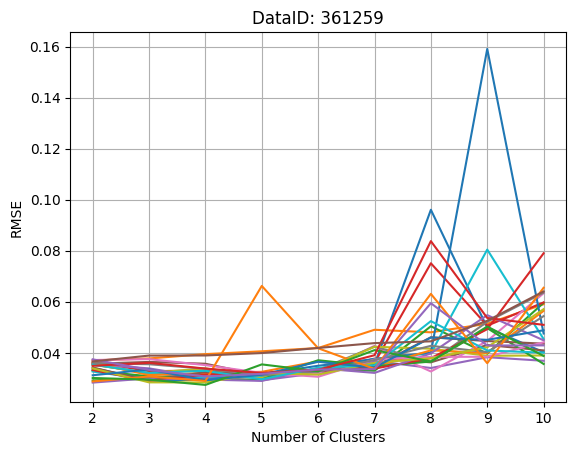

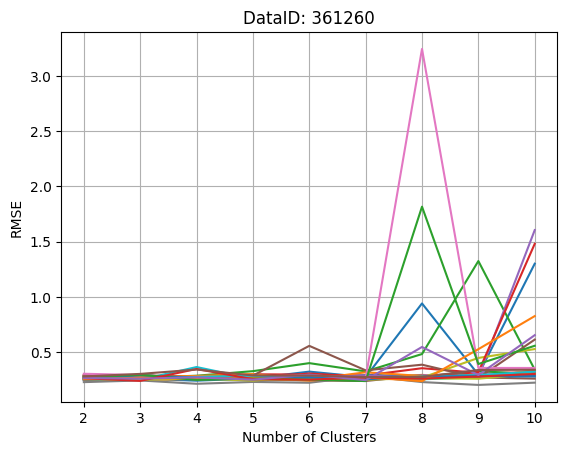

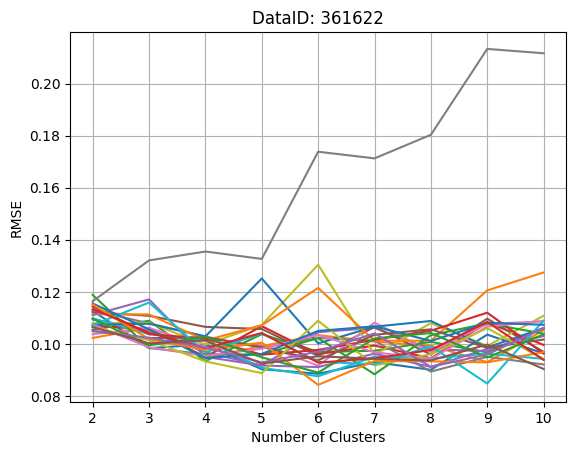

In [100]:
# plot the data, with nclust on x-axis and the rest being lines
i = 0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result.plot(grid=True)
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    # move legend to side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # remove legend
    plt.legend().remove()
    plt.show()
    i+=1


In [101]:
data_results[0]

,nclust,lmdi_ridge,aloo_l2_signed_normed_noleafavg_norank,nonloo_l2_unsigned_nonnormed_noleafavg_norank,aloo_l2_unsigned_normed_noleafavg_rank,nonloo_nonl2_unsigned_nonnormed_noleafavg_rank,aloo_l2_signed_normed_noleafavg_rank,aloo_l2_signed_nonnormed_noleafavg_rank,nonloo_l2_unsigned_normed_noleafavg_norank,rawdata,...,nonloo_l2_signed_normed_noleafavg_rank,nonloo_l2_signed_nonnormed_noleafavg_norank,aloo_l2_signed_nonnormed_noleafavg_norank,aloo_nonl2_unsigned_nonnormed_noleafavg_rank,nonloo_l2_signed_nonnormed_noleafavg_rank,lmdi_baseline,aloo_l2_unsigned_nonnormed_noleafavg_rank,nonloo_l2_unsigned_normed_noleafavg_rank,lime,nonloo_l2_signed_normed_noleafavg_norank
0,2,2.311079e+01,6.252605e+05,9.296644e+01,5.120805e+01,4.649235e+01,1.819256e+01,1.881731e+01,5.232357e+01,1.955093e+01,...,2.469885e+05,3.141752e+01,2.229413e+01,2.276840e+01,4.010341e+01,2.810067e+01,4.072127e+01,3.158104e+01,1.036050e+02,3.002511e+01
1,3,1.013604e+02,2.955016e+02,1.109200e+02,7.542218e+01,5.660524e+01,1.671550e+02,5.090679e+01,6.066720e+01,2.893648e+01,...,2.106720e+02,1.007541e+02,6.703516e+01,5.655978e+01,6.152765e+01,1.771106e+05,2.416361e+02,1.114383e+02,1.296980e+02,2.202045e+02
2,4,1.360637e+05,1.570083e+04,2.726269e+02,1.273834e+05,1.760142e+02,7.962072e+08,3.431625e+02,1.284827e+07,2.613066e+01,...,4.170622e+02,5.815618e+04,3.539975e+02,9.366919e+01,1.772032e+02,1.442584e+05,5.696785e+02,3.948486e+03,2.739302e+05,6.644389e+01
3,5,8.719107e+03,2.074473e+03,6.067783e+01,2.481538e+04,3.116779e+07,5.748171e+06,2.393367e+02,2.271490e+04,7.885906e+02,...,2.068101e+03,2.498104e+05,3.367272e+03,5.554219e+04,2.601168e+03,5.130713e+08,4.271206e+06,8.360917e+08,7.184998e+08,2.958252e+04
4,6,5.728780e+06,1.116723e+06,1.537322e+02,1.048529e+04,1.553114e+09,1.132142e+09,1.701368e+05,4.770950e+05,1.341969e+02,...,6.098385e+05,9.864178e+02,3.123022e+05,3.326280e+08,3.715059e+11,7.229768e+07,1.297426e+07,2.602657e+06,4.457127e+06,1.772270e+04
5,7,4.780905e+05,6.001165e+04,6.366777e+06,3.455281e+03,1.074896e+08,4.164254e+05,3.397791e+07,2.427479e+07,1.980644e+03,...,3.111292e+08,2.060083e+09,2.412734e+09,3.754691e+08,2.412763e+05,4.783604e+08,3.455062e+05,8.364442e+03,9.500430e+06,1.644328e+06
6,8,3.707724e+10,1.601995e+05,2.601497e+09,5.495632e+04,8.808882e+07,5.008406e+10,8.276637e+06,1.257992e+07,1.031778e+04,...,3.481067e+08,3.130310e+10,9.971316e+06,5.491333e+06,4.791161e+09,7.936494e+08,2.910856e+06,4.223033e+04,1.457063e+05,2.054288e+04
7,9,1.289424e+04,9.360585e+04,3.713166e+04,6.285434e+08,2.901749e+06,1.504306e+09,1.547156e+08,4.251629e+08,1.422652e+04,...,1.800623e+11,1.651193e+08,3.464653e+05,7.142204e+03,3.938059e+06,7.799954e+09,8.002621e+04,3.047389e+09,6.768241e+07,4.300903e+08
8,10,2.239441e+10,1.110225e+08,6.233501e+06,2.967493e+04,2.696858e+08,1.712099e+05,3.035351e+03,2.369144e+05,2.612402e+10,...,2.447210e+10,2.035806e+07,9.873820e+03,3.927941e+08,3.227150e+09,3.882526e+08,9.882694e+07,4.852223e+05,6.585757e+10,2.870660e+04


In [102]:
# plot the data, only shap and aloo_l2_unsigned_nonnormed_leafavg_rank
# i=0
# for data_result in data_results:
#     data_result = data_result.set_index("nclust")
#     data_result[["shap", "nonloo_l2_signed_nonnormed_leafavg_rank"]].plot(grid=True)
#     # move legend to side
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     # call aloo_l2_unsigned_nonnormed_leafavg_rank lmdi+
#     plt.legend(["SHAP", "LMDI+"])
#     # y axis label is RMSE
#     plt.ylabel("RMSE")
#     # x axis label is number of clusters
#     plt.xlabel("Number of Clusters")
#     # title is the dataid
#     plt.title("DataID: " + dataids[i])
#     plt.show()
#     i+=1

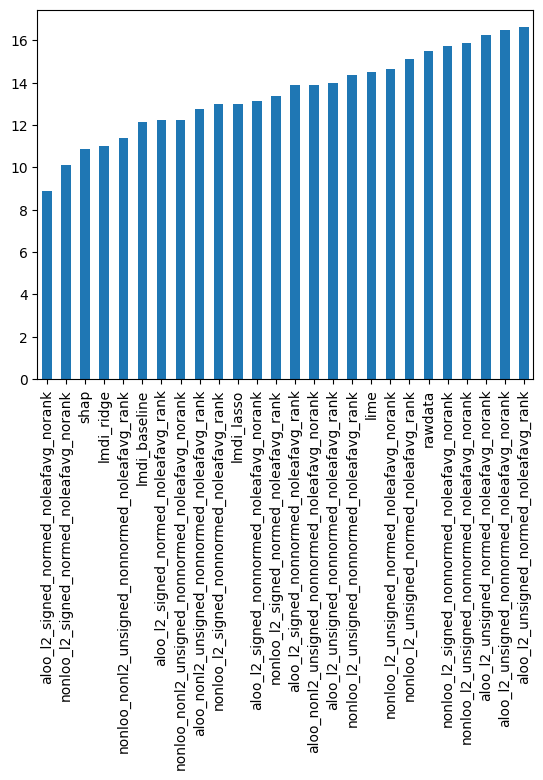

In [103]:
auroc_ranks = []
for data_result in data_results:
    auroc = data_result.drop("nclust", axis=1).apply(np.trapz, x=data_result["nclust"])
    # convert to ranking, i.e. 1 is lowest, 2 is second lowest, etc.
    auroc_rank = auroc.rank()
    auroc_ranks.append(auroc_rank)
# merge series in auroc_ranks by averaging the ranks corresponding to the same names
auroc_ranks = pd.concat(auroc_ranks, axis=1)
auroc_ranks = auroc_ranks.mean(axis=1)
auroc_ranks = auroc_ranks.sort_values()
auroc_ranks.plot(kind="bar")
plt.show()

In [104]:
auroc_ranks

aloo_l2_signed_normed_noleafavg_norank               8.875
nonloo_l2_signed_normed_noleafavg_norank            10.125
shap                                                10.875
lmdi_ridge                                          11.000
nonloo_nonl2_unsigned_nonnormed_noleafavg_rank      11.375
lmdi_baseline                                       12.125
aloo_l2_signed_normed_noleafavg_rank                12.250
nonloo_nonl2_unsigned_nonnormed_noleafavg_norank    12.250
aloo_nonl2_unsigned_nonnormed_noleafavg_rank        12.750
nonloo_l2_signed_nonnormed_noleafavg_rank           13.000
lmdi_lasso                                          13.000
aloo_l2_signed_nonnormed_noleafavg_norank           13.125
nonloo_l2_signed_normed_noleafavg_rank              13.375
aloo_l2_signed_nonnormed_noleafavg_rank             13.875
aloo_nonl2_unsigned_nonnormed_noleafavg_norank      13.875
aloo_l2_unsigned_nonnormed_noleafavg_rank           14.000
nonloo_l2_unsigned_nonnormed_noleafavg_rank         14.3